In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from kaldi_io import read_vec_flt

plt.rc('font', family='Times New Roman')

In [9]:
sv_dir = '/home/yangwenhao/local/project/SpeakerVerification-pytorch'
lstm_dir = '/home/work2020/yangwenhao/project/lstm_speaker_verification'

In [3]:
# with open('')

gen = ["advertisement", "drama", "entertainment", 
       "interview", "live_broadcast", "movie", "play", "recitation", "singing", "speech", "vlog"]
for s in gen:
    print(s, end=' ')

# for s in advertisement drama entertainment interview live_broadcast movie play recitation singing speech vlog; do
#     num=`cat data/cnceleb/dev/wav.scp | grep ${s} | wc -l`
#     echo "${s} ${num}"
# done

advertisement drama entertainment interview live_broadcast movie play recitation singing speech vlog 

In [4]:
numofutt = {}
with open(sv_dir + '/Misc/cnc/geners', 'r') as f:
    for l in f.readlines():
        try:
            g, nu = l.split()
#             if g in numofutt:
            numofutt.setdefault(g, []).append(int(nu))
        except:
            continue

In [5]:
numofutt

{'advertisement': [100, 1542],
 'drama': [6320, 13116],
 'entertainment': [18376, 31982],
 'interview': [52845, 34024],
 'live_broadcast': [6400, 167019],
 'movie': [2509, 4449],
 'play': [4189, 14992],
 'recitation': [2639, 58231],
 'singing': [10534, 42157],
 'speech': [6263, 36680],
 'vlog': [1084, 125293]}

In [6]:
numofutt_lst = [numofutt[a] for a in numofutt]
gen = [a for a in numofutt]

numofutt_np = np.array(numofutt_lst)

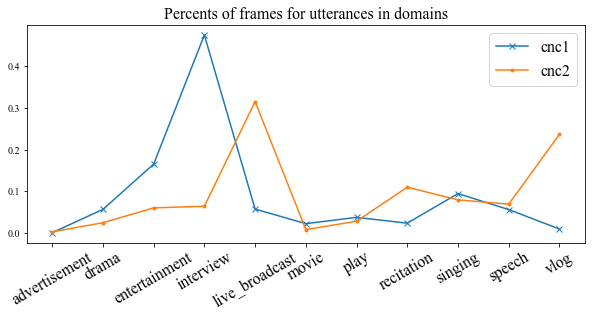

In [8]:
plt.figure(figsize=(10, 4))
plt.title("Percents of frames for utterances in domains", fontsize=16)

plt.plot(numofutt_np[:,0]/numofutt_np[:,0].sum(), marker='x')
plt.plot(numofutt_np[:,1]/numofutt_np[:,1].sum(), marker='.')

_ = plt.xticks(np.arange(11), gen, rotation=30, fontsize=16)
plt.legend(['cnc1','cnc2'], fontsize=16)
# for x in xs:
#     plt.text(x, 0.05, gen[x], ha='center', va='bottom',fontsize=7) 

In [10]:
for name_set in ['dev', 'test']:
    vad_scp = 'data/cnceleb/klfb/%s_fb40/vad.scp'%name_set

    all_frames = 0
    silence_frames = 0
    with open(os.path.join(lstm_dir,vad_scp), 'r') as f:
        for l in f.readlines():
            uid, upath = l.split()
            vad_vec = read_vec_flt(upath)

            all_frames += len(vad_vec)
            silence_frames += len(vad_vec) - np.sum(vad_vec)

    print('In cnceleb %s set, the percent of scilent frames is %.2f%%.' % (name_set, (silence_frames/all_frames)*100))

In cnceleb dev set, the percent of scilent frames is 3.23%.
In cnceleb test set, the percent of scilent frames is 4.16%.


In [11]:
for name_set in ['dev', 'test']:
    vad_scp = 'data/vox1/klfb/%s_fb40/vad.scp'%name_set

    all_frames = 0
    silence_frames = 0
    with open(os.path.join(lstm_dir,vad_scp), 'r') as f:
        for l in f.readlines():
            uid, upath = l.split()
            vad_vec = read_vec_flt(upath)

            all_frames += len(vad_vec)
            silence_frames += len(vad_vec) - np.sum(vad_vec)

    print('In vox1 %s set, the percent of scilent frames is %.2f%%.' % (name_set, (silence_frames/all_frames)*100))

In vox1 dev set, the percent of scilent frames is 4.36%.
In vox1 test set, the percent of scilent frames is 4.05%.
